# India Credit Card Spendings EDA
![creditcard.jpeg](creditcard.jpeg)

A leading bank in India provides various payment options, including Gold, Platinum, Silver, and Signature cards. To support the promotion of these payment methods, the bank has collected data on the spending habits of its customers across the country. Analyzing this data is essential to address key business questions and enhance the effectiveness of their promotional efforts.

This project focuses on analyzing and predicting the spending patterns of individuals in 986 Indian cities using data sourced from Kaggle.

The project is structured into seven key phases:

Data Import and Inspection Feature Engineering Business Solution and Data Analysis The data is sourced from Kaggle's repository.

# Data Importing and Inspection
In this section, various libraries essential for the tasks mentioned are imported. These libraries will aid in data manipulation, analysis, and visualization. Additionally, the file containing the dataset to be analyzed is imported. The data will then be inspected to understand its structure, quality, and any necessary preprocessing steps for further analysis.

Importing the libraries needed

In [547]:
import pandas as pd #for importing data and dataframe manipulation

import matplotlib.pyplot as plt # for plotting data

import seaborn as sns

import plotly.express as px


# Reading the csv dataset
The file containing the data is in a comma-separated values (CSV) format. The Pandas library provides a convenient function, read_csv(), which can be used to import .csv files.

In [548]:
df = pd.read_csv('Credit card transactions India.csv')

# Inspecting the data

In [549]:
df.head(10) #To get thge first 10 rows

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [550]:
df.describe() #To get all the numerical descriptions about the data

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [551]:
df.describe(include="all") #To get all the numerical and string descriptions about the data

,index,City,Date,Card Type,Exp Type,Gender,Amount
count,26052.000000,26052,26052,26052,26052,26052,26052.000000
unique,NaN,986,600,4,6,2,NaN
top,NaN,"Bengaluru, India",20-Sep-14,Silver,Food,F,NaN
freq,NaN,3552,65,6840,5463,13680,NaN
mean,13025.500000,NaN,NaN,NaN,NaN,NaN,156411.537425
std,7520.708943,NaN,NaN,NaN,NaN,NaN,103063.254287
min,0.000000,NaN,NaN,NaN,NaN,NaN,1005.000000
25%,6512.750000,NaN,NaN,NaN,NaN,NaN,77120.250000
50%,13025.500000,NaN,NaN,NaN,NaN,NaN,153106.500000
75%,19538.250000,NaN,NaN,NaN,NaN,NaN,228050.000000


In [552]:
df.shape #This returns a tuple representing the dimensions of the DataFrame (rows, columns)

(26052, 7)

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [554]:
df.nunique() #This returns the number of unique values for each column.

index        26052
City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
dtype: int64

In [555]:
df.isnull()  # Count of null values in each column. They return True for missing values and False for non-missing values.
 

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26047,False,False,False,False,False,False,False
26048,False,False,False,False,False,False,False
26049,False,False,False,False,False,False,False
26050,False,False,False,False,False,False,False


The dataset consists of various features that describe spending habits across a large number of cities and demographic groups. Below is a summary of the key features:

Cities: There are 986 distinct cities represented in the dataset, out of a total of 26,052 records.
Gender: The dataset includes information on 2 gender types.
Card Types: Four different card types are used, namely Gold, Platinum, Silver, and Signature.
Expense Types: Six distinct expense types are recorded, reflecting different categories of customer spending.

# Data Exploration


In this section, we explore the different data attributes in more detail by examining their distinct values. This helps to better understand the dataset's structure and identify key variables for analysis. For instance, we can inspect the unique values for categorical variables such as city names, gender, card types, and expense types.

In [556]:
df['Gender'].value_counts() #to get the different number for genders 

Gender
F    13680
M    12372
Name: count, dtype: int64

In [557]:
df['Card Type'].value_counts() #to get the different number for each card type

Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

In [558]:
df['Exp Type'].value_counts() #to get the different number for expense type

Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

In [559]:
df['City'].value_counts().head(15) #to get the first 15 city count in a descreasing order

City
Bengaluru, India           3552
Greater Mumbai, India      3493
Ahmedabad, India           3491
Delhi, India               3482
Hyderabad, India            784
Chennai, India              774
Kolkata, India              773
Kanpur, India               764
Lucknow, India              759
Jaipur, India               752
Surat, India                749
Pune, India                 747
Ramnagar, India              19
Kalyan-Dombivali, India      19
Vijayapura, India            15
Name: count, dtype: int64

In [560]:
df.columns.duplicated() #if true, the data set has duplicates

array([False, False, False, False, False, False, False])

# Data Preprocessing

In [561]:
# Split the 'City' column and keep only the first part (city name before the comma)
df['City'] = df['City'].astype(str).str.split(", ").str[0]

# Display the first 10 rows to check the result
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574
5,5,Delhi,8-Sep-14,Silver,Bills,F,100036
6,6,Delhi,24-Feb-15,Gold,Bills,F,143250
7,7,Greater Mumbai,26-Jun-14,Platinum,Bills,F,150980
8,8,Delhi,28-Mar-14,Silver,Bills,F,192247
9,9,Delhi,1-Sep-14,Platinum,Bills,F,67932


# Business Data Analysis
In this section we are using the data to answer specific question to come up with solid business solutions.
1. Which 10 cities was the difference in the total expenditure between males and females the most and the least?

In [562]:
#To find the cities with the highest expednditure
city_group = df.groupby('City', as_index=False)['Amount'].aggregate('sum').sort_values(by='Amount', ascending=False)
city_group

,City,Amount
170,Greater Mumbai,576751476
71,Bengaluru,572326739
8,Ahmedabad,567794310
126,Delhi,556929212
267,Kolkata,115466943
...,...,...
106,Changanassery,30074
881,Tirur,26094
52,Bahraich,24253
317,Mahbubnagar,15458


In [563]:
# creating a groupby table of City and Gender with the total amount as the sum
gender_group = df.groupby(['City', 'Gender'], as_index = False)['Amount'].sum()
gender_group

,City,Gender,Amount
0,Achalpur,F,860976
1,Achalpur,M,745665
2,Adilabad,F,1164430
3,Adilabad,M,605034
4,Adityapur,F,506773
...,...,...,...
1871,Zira,M,1249659
1872,Zirakpur,F,289172
1873,Zirakpur,M,260491
1874,Zunheboto,F,78591


In [564]:
#gender_group = df.drop('Date', axis=1) #to drop the date column since its not needed. if axis was 0 it would have droped the row.
gender_group
# Seperating the Male and Female total amounts and renaming the column for better identification
Male_Amount = gender_group[gender_group['Gender']=='M'].drop('Gender', axis=1)
Male_Amount.rename(columns={'Amount':'Male_Amount'}, inplace=True)
Male_Amount



,City,Male_Amount
1,Achalpur,745665
3,Adilabad,605034
5,Adityapur,457220
7,Adoni,581613
9,Adoor,330288
...,...,...
1867,Zaidpur,544965
1869,Zamania,775316
1871,Zira,1249659
1873,Zirakpur,260491


In [565]:
Female_Amount = gender_group[gender_group['Gender']=='F'].drop('Gender', axis=1)
Female_Amount.rename(columns={'Amount':'Female_Amount'}, inplace=True)
Female_Amount

,City,Female_Amount
0,Achalpur,860976
2,Adilabad,1164430
4,Adityapur,506773
6,Adoni,993742
8,Adoor,317437
...,...,...
1866,Zaidpur,178853
1868,Zamania,90318
1870,Zira,390888
1872,Zirakpur,289172


In [566]:
# merging the two datasets
Total_amount_Gender = Male_Amount.merge(Female_Amount, on = 'City')

# printing the new dataset
Total_amount_Gender.head()

,City,Male_Amount,Female_Amount
0,Achalpur,745665,860976
1,Adilabad,605034,1164430
2,Adityapur,457220,506773
3,Adoni,581613,993742
4,Adoor,330288,317437


In [567]:
# Ensure 'Male_Amount' and 'Female_Amount' columns exist and are numeric
Total_amount_Gender['Male_Amount'] = pd.to_numeric(Total_amount_Gender['Male_Amount'], errors='coerce')
Total_amount_Gender['Female_Amount'] = pd.to_numeric(Total_amount_Gender['Female_Amount'], errors='coerce')

# Calculate the difference directly using Pandas operations
Total_amount_Gender['Difference'] = Total_amount_Gender['Male_Amount'] - Total_amount_Gender['Female_Amount']
Total_amount_Gender['Difference']

0     -115311
1     -559396
2      -49553
3     -412129
4       12851
        ...  
885    366112
886    684998
887    858771
888    -28681
889    309247
Name: Difference, Length: 890, dtype: int64

This section calculates the difference in expenditure between male and female customers for each city.
First, the 'Male_Amount' and 'Female_Amount' columns are converted to numeric values to ensure proper arithmetic.
Any non-numeric values are coerced to NaN to prevent errors during the calculation.
The difference between 'Male_Amount' and 'Female_Amount' is calculated directly using vectorized operations in Pandas.
This approach is more efficient and readable compared to looping through each city individually.
The result is stored in a new column called 'Difference'.


In [568]:
# seperating the dataset into positive and negative difference values 
Female_Dominated_Areas = Total_amount_Gender[Total_amount_Gender['Difference']<0]
Male_Dominated_Areas = Total_amount_Gender[Total_amount_Gender['Difference']>0]

In [569]:
# Printing the top 10 rows where females spend more than males
Female_Dominated_Areas.sort_values(by='Difference')[['City', 'Difference']].head(10)

,City,Difference
148,Greater Mumbai,-98482616
109,Delhi,-90455386
64,Bengaluru,-90070153
6,Ahmedabad,-70550240
209,Kanpur,-5293918
178,Jaipur,-4318183
747,Surat,-2436567
634,Sankari,-1571980
509,Phulabani,-1468335
165,Hisar,-1296136


In [570]:
# Printing the bottom 5 rows where females spend more than females
Female_Dominated_Areas.sort_values(by='Difference', ascending=False)[['City', 'Difference']].head(5)

,City,Difference
99,Chirkunda,-335
23,Amroha,-7053
313,Maner,-7341
769,Tezpur,-9193
567,Ramanagaram,-9886


In [571]:
# Printing the top 10 rows where males spend more than females
Male_Dominated_Areas.sort_values(by='Difference', ascending=False)[['City', 'Difference']].head(10)

,City,Difference
238,Kolkata,9048465
95,Chennai,4105150
133,Fatehpur Sikri,1328782
326,Margao,1323745
412,Nautanwa,1249356
821,Ujjain,1241294
727,Sonipat,1213293
393,Nanded-Waghala,1163958
710,Sinnar,1083376
154,Gurgaon,1062312


In [572]:
# Printing the bottom 5 rows where males spend more than females
Male_Dominated_Areas.sort_values(by='Difference')[['City', 'Difference']].head(5)

,City,Difference
830,Upleta,3610
797,Tirupati,3717
439,Nongstoin,4319
603,Rosera,5663
136,Forbesganj,6641


# Conclusion:

Based on the analysis, the bank's advertising efforts should be strategically targeted as follows:

Females: Cities such as Greater Mumbai, Delhi, Bengaluru, Ahmedabad, Kanpur, and Jaipur exhibit the highest spending by female customers. Therefore, it would be most effective to focus advertising campaigns in these cities, specifically targeting female customers.

Males: In contrast, cities like Kolkata, Chennai, Fatehpur Sikri, Margao, and Nautanwa have shown the highest expenditure by male customers. Advertising in these cities should be tailored to appeal to male customers.

By tailoring advertising strategies based on city-level spending patterns, the bank can optimize its promotional efforts to reach the most lucrative customer segments.



Question 2: Which expense type generates the most revenue and what are the card types used?


Reason:
Since the bank offers four different card types—Silver, Gold, Platinum, and Signature—it is crucial to analyze which card type generates the most revenue. By identifying the card type with the highest usage and revenue contribution, the bank can optimize its inventory and ensure that the most popular and profitable cards are readily available to meet customer demand.


Procedure:

The dataset was grouped by Expense Type and Card Type to analyze the total amount spent for each combination using the groupby function. This allowed us to identify which card types are most commonly used for different expense categories.

The grouped data was then visualized in a bar chart to provide a clearer view of spending patterns, helping to illustrate which card type generates the most revenue for each expense type.

In [573]:
# finding the sum of amount for each combination of Expense Type and Card Type using the groupby function 
Expense = df.groupby(["Exp Type", "Card Type"], as_index=False)['Amount'].sum()

# printing the dataset
Expense

,Exp Type,Card Type,Amount
0,Bills,Gold,225533948
1,Bills,Platinum,222027597
2,Bills,Signature,226115472
3,Bills,Silver,233395456
4,Entertainment,Gold,173468463
5,Entertainment,Platinum,185608738
6,Entertainment,Signature,178648981
7,Entertainment,Silver,188711354
8,Food,Gold,193756454
9,Food,Platinum,210318810


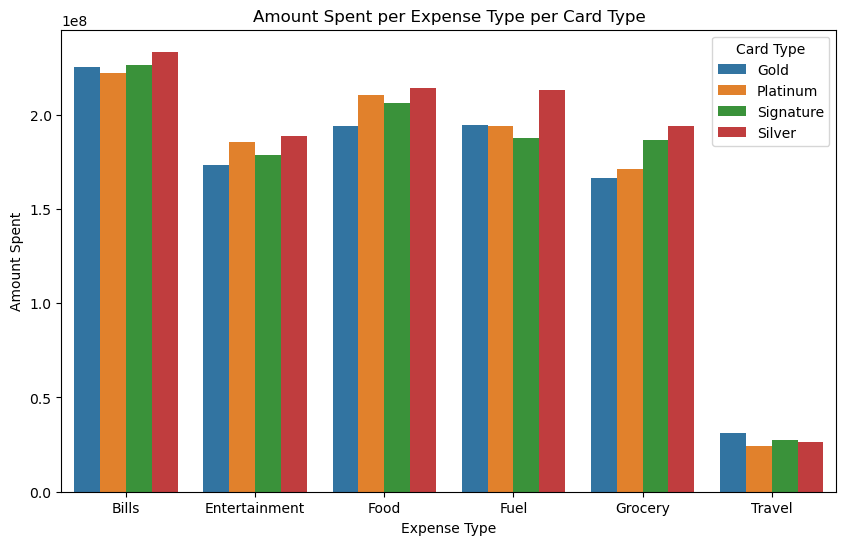

In [574]:
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=Expense, x="Exp Type", y="Amount", hue="Card Type")

# Set chart labels and title
plt.xlabel("Expense Type")
plt.ylabel("Amount Spent")
plt.title("Amount Spent per Expense Type per Card Type")

# Show the plot
plt.show()


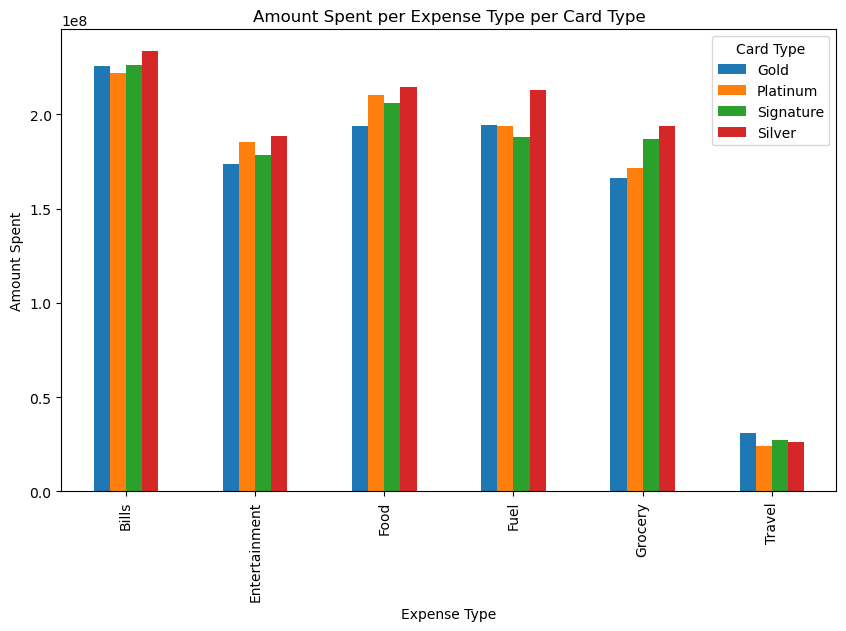

In [575]:
# Pivot the table for easier plotting (optional but helps with multi-category plotting)
Expense_pivot = Expense.pivot(index="Exp Type", columns="Card Type", values="Amount")

# Plot the bar chart
Expense_pivot.plot(kind="bar", figsize=(10, 6))

# Set chart labels and title
plt.xlabel("Expense Type")
plt.ylabel("Amount Spent")
plt.title("Amount Spent per Expense Type per Card Type")

# Show the plot
plt.show()


# Conclusion:

The bar chart clearly shows that the Silver card type is the most frequently used across all expense types. Additionally, Bills have the highest total expense amount compared to other categories. Therefore, the bank should prioritize stocking and promoting the Silver card type, particularly to customers who regularly use their cards for paying bills, as this group represents a significant revenue source.

Question 3: What are the amount monthly trends for the card types with the various related-expenses.

Reason:
Knowing the how people spend per month per card could inform the bank policy maker as to when they should roll out or intensify services in increase card spendings.

Procedure:
Extract the Month names from the Date column.
Finding the total expenditure for the different months per card type.
Creating a plot to visualize the trend of the data.
This task requires data on a monthly basis. However, the dataset contains only the full date of transaction. Since the Date column can be converted into data type datetime, the months, days, years and date number can be easily extracted

In [576]:
# creating a class called DateColumnsExtractor
class DateColumnsExtractor:
    def __init__(self, date_format='%d-%b-%y'):
        self.date_format = date_format
    
    def extract_year(self, df, date_column):
        """
        Extracts the year from a date column in a Pandas DataFrame.
        
        Returns:
        pandas.DataFrame: The original DataFrame with a new column for the year.
        """
        try:
            # Check if the column exists
            if date_column in df.columns:
                # Convert the Date column using the specified date format
                df['Year'] = pd.to_datetime(df[date_column], format=self.date_format).dt.year
            else:
                raise KeyError(f"'{date_column}' column not found in the DataFrame.")
        except Exception as e:
            print(f"Error extracting year: {e}")
        
        return df
    
    def extract_month_name(self, df, date_column):
        """
        Extracts the month name from a date column in a Pandas DataFrame.
              
        Returns:
        pandas.DataFrame: The original DataFrame with a new column for the month name.
        """
        try:
            # Check if the column exists
            if date_column in df.columns:
                # Convert the Date column using the specified date format
                df['Month'] = pd.to_datetime(df[date_column], format=self.date_format).dt.month_name()
            else:
                raise KeyError(f"'{date_column}' column not found in the DataFrame.")
        except Exception as e:
            print(f"Error extracting month name: {e}")
        
        return df
    
    def extract_day_number(self, df, date_column):
        """
        Extracts the day number from a date column in a Pandas DataFrame.
                
        Returns:
        pandas.DataFrame: The original DataFrame with a new column for the day number.
        """
        try:
            # Check if the column exists
            if date_column in df.columns:
                # Convert the Date column using the specified date format
                df['Day Number'] = pd.to_datetime(df[date_column], format=self.date_format).dt.day
            else:
                raise KeyError(f"'{date_column}' column not found in the DataFrame.")
        except Exception as e:
            print(f"Error extracting day number: {e}")
        
        return df
    
    def extract_day_name(self, df, date_column):
        """
        Extracts the day name from a date column in a Pandas DataFrame.
        
        Returns:
        pandas.DataFrame: The original DataFrame with a new column for the day name.
        """
        try:
            # Check if the column exists
            if date_column in df.columns:
                # Convert the Date column using the specified date format
                df['Day Name'] = pd.to_datetime(df[date_column], format=self.date_format).dt.day_name()
            else:
                raise KeyError(f"'{date_column}' column not found in the DataFrame.")
        except Exception as e:
            print(f"Error extracting day name: {e}")
        
        return df

# calling the DateColumnsExtractor class
date_extractor = DateColumnsExtractor()

# Extracting the month name from the date column in the DataFrame
df = date_extractor.extract_month_name(df, 'Date')

# Checking if the 'Month' column has been created successfully
df.head()


,index,City,Date,Card Type,Exp Type,Gender,Amount,Month
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,October
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,August
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,August
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,April
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,May


In [577]:
# finding the total amount spent per month per card type
df_month_group=df.groupby(["Month", "Card Type"], as_index=False)['Amount'].sum()

# printing the grouped data
df_month_group.head(10)



,Month,Card Type,Amount
0,April,Gold,100738615
1,April,Platinum,106793699
2,April,Signature,102329658
3,April,Silver,106532762
4,August,Gold,49719139
5,August,Platinum,57936507
6,August,Signature,51965786
7,August,Silver,58831694
8,December,Gold,96458848
9,December,Platinum,101509431


Index(['Card Type', 'Month', 'Amount'], dtype='object')


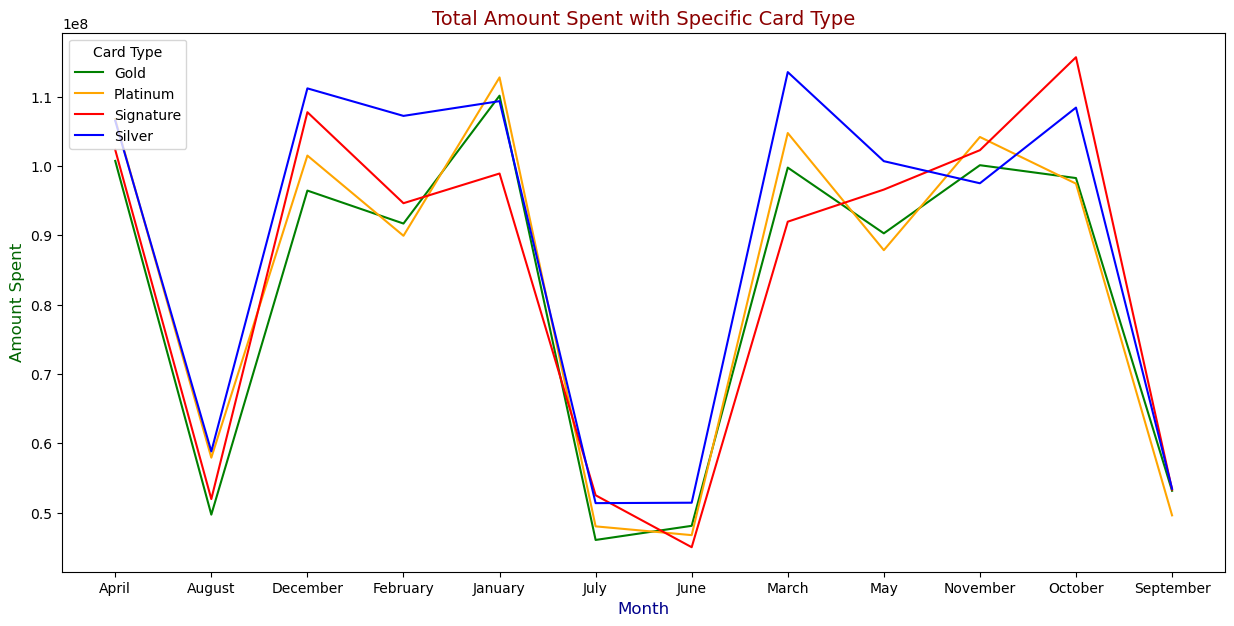

In [578]:
# Group by Card Type and Month and sum the 'Amount' column
df_month_group = df.groupby(['Card Type', 'Month'])['Amount'].sum().reset_index()

# Now df_month_group should be a DataFrame, so we can proceed with the plotting
print(df_month_group.columns)  # Ensure the 'Amount' column exists

# Proceed with plotting
if 'Amount' in df_month_group.columns:
    
    # Creating a dictionary to store the data to be plotted
    cat = {}

    # Setting the size of the plot
    plt.figure(figsize=(15, 7))

    # Colors for the line chart for each card type
    colors = {'Silver': 'blue', 'Gold': 'green', 'Platinum': 'orange', 'Signature': 'red'}

    # Create a line chart for each category (Card Type)
    for category, category_df in df_month_group.groupby('Card Type'):
        
        # Storing the key and its value in the dictionary
        cat[category] = category_df
        
        # Creating a line plot of the data with a specific color for each Card Type
        plt.plot(category_df['Month'], category_df['Amount'], 
                 label=category, color=colors.get(category, 'purple'))  # Default to 'purple' if color not found

    # Adding labels and title
    plt.xlabel('Month', color='darkblue', fontsize=12)
    plt.ylabel('Amount Spent', color='darkgreen', fontsize=12)
    plt.title('Total Amount Spent with Specific Card Type', color='darkred', fontsize=14)

    # Showing the legends
    plt.legend(title="Card Type", loc="upper left", frameon=True, fontsize=10)

    # Display the chart
    plt.show()

else:
    print("Error: 'Amount' column not found in the dataset")


# Conclusion:

From the trend graph, it is evident that the months of June, July, August, and September exhibit the lowest total expenditure amounts. To stimulate spending during these months, the bank could consider offering more incentives, such as special promotions, discounts, or reward programs, which may encourage increased customer engagement and spending.

Question 4: What is the spending habit of males and females for the different days of the week and months of the year?

Reason:

Understanding the spending patterns by day and month can help the bank optimize its advertising strategies and better target specific periods with promotions or incentives. By identifying periods of lower expenditure, the bank can create focused campaigns to boost spending during those times.

Procedure:

Group the total expenditure data by day of the week and month, segmented by gender.
Plot a chart to visualize the total amount spent for each category, allowing for easy comparison and identification of trends.

In [579]:
# Specify the correct format for your date column: "29-Oct-14" -> "%d-%b-%y"
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Extract the day name from the 'Date' column
df['Day Name'] = df['Date'].dt.day_name()

# Grouping the data by day name and gender, then summing the 'Amount'
spending_per_day = df.groupby(["Day Name", "Gender"], as_index=False)['Amount'].sum()

# Printing the grouped data
spending_per_day


,Day Name,Gender,Amount
0,Friday,F,319484869
1,Friday,M,263343938
2,Monday,F,306681553
3,Monday,M,266944922
4,Saturday,F,316807962
5,Saturday,M,271305008
6,Sunday,F,321720502
7,Sunday,M,274624865
8,Thursday,F,311548731
9,Thursday,M,262850287


In [580]:
# creating a chart of the data
px.bar(spending_per_day, x="Day Name", y="Amount",color="Gender", text_auto=True)

In [581]:
# Assuming 'Date' is already in datetime format, extract the month name from the 'Date' column
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

# Grouping the data by month and gender, then summing the 'Amount'
spendings_per_month = df.groupby(["Month", "Gender"], as_index=False)['Amount'].sum()

# Custom sorting for months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"]

# Ensure the month order is correct
spendings_per_month['Month'] = pd.Categorical(spendings_per_month['Month'], categories=month_order, ordered=True)

# Sorting the DataFrame by month order
spendings_per_month = spendings_per_month.sort_values('Month')

spendings_per_month


,Month,Gender,Amount
8,January,F,227700168
9,January,M,203509388
6,February,F,210401905
7,February,M,173110719
15,March,M,184395043
14,March,F,225659403
0,April,F,225640906
1,April,M,190753828
17,May,M,163605316
16,May,F,211850293


In [582]:
# Creating a bar chart of the data
fig = px.bar(spendings_per_month, x="Month", y="Amount", color="Gender", text_auto=True,
             title="Monthly Spendings by Gender")

# Show the plot
fig.show()

# Conclusion:
The analysis shows minimal variation in spending between males and females. However, overall, females tend to spend slightly more than males in both weekly and monthly breakdowns. This trend holds consistently across different time periods, indicating a small but noticeable difference in spending habits between the two genders.

Question 5: Which expense type do customers spend the most on at the end of each month?


Reason:
Spending patterns often peak toward the end of the month, coinciding with salary payments. Understanding these patterns and offering incentives during this period can drive increased spending, thereby boosting revenue. By targeting consumers when they are more likely to have disposable income, businesses can capitalize on heightened purchasing power.


Procedure:

Extract the day number: Extract the day of the month from the Date column to identify specific days like the 29th, 30th, and 31st.
Subset the data: Filter the dataset to include only entries from the 29th, 30th, and 31st of each month.
Group the data: Group the filtered data by day number and gender, then calculate the total spending for these days.
Create a chart: Visualize the grouped data with a bar chart, showing the total expenses for the 29th, 30th, and 31st, segmented by gender.

In [583]:
import pandas as pd
import plotly.express as px

# Step 1: Extract the day number from the 'Date' column
df['Day'] = pd.to_datetime(df['Date']).dt.day

# Step 2: Subset the data for the end of the month (29th, 30th, 31st)
end_of_month_data = df[df['Day'].isin([29, 30, 31])]

# Step 3: Group the data by day number and gender, then sum the 'Amount'
grouped_end_of_month = end_of_month_data.groupby(['Day', 'Gender'], as_index=False)['Amount'].sum()

# Step 4: Create a bar chart of the grouped data
fig = px.bar(grouped_end_of_month, x='Day', y='Amount', color='Gender', text_auto=True,
             title="Spending on End-of-Month Days (29th, 30th, 31st) by Gender")

# Show the plot
fig.show()


In [584]:
# extracting the month name from the date column

df = date_extractor.extract_day_number(df, 'Date')

def DaysNum(df, days):
    DayData = pd.DataFrame()
    for i in days:
        data = df[df['Day Number']==i]
        DayData = pd.concat([DayData, data])
    return DayData


# list of desired days
Days = [29, 30, 31]

# using the function to subset the dataset for the 29th, 30th and 31st
End_of_Month = DaysNum(df, Days)

# grouping the subset data using the egroupby function
#End_of_month_grouped = End_of_Month.groupby(['Day Number', 'Month', 'Exp Type'], as_index=False).sum()
End_of_Month

,index,City,Date,Card Type,Exp Type,Gender,Amount,Month,Day Name,Day,Day Number
0,0,Delhi,2014-10-29,Gold,Bills,F,82475,October,Wednesday,29,29
63,63,Greater Mumbai,2013-10-29,Signature,Bills,F,557370,October,Tuesday,29,29
78,78,Bengaluru,2014-03-29,Silver,Bills,F,499079,March,Saturday,29,29
130,130,Greater Mumbai,2013-10-29,Platinum,Bills,F,555123,October,Tuesday,29,29
283,283,Bengaluru,2014-11-29,Platinum,Bills,F,537050,November,Saturday,29,29
...,...,...,...,...,...,...,...,...,...,...,...
25663,25663,Kolkata,2014-08-31,Platinum,Travel,M,109878,August,Sunday,31,31
25671,25671,Kolkata,2013-12-31,Silver,Travel,F,50095,December,Tuesday,31,31
25810,25810,Hyderabad,2015-01-31,Gold,Travel,F,152789,January,Saturday,31,31
25975,25975,Lucknow,2014-12-31,Silver,Travel,M,199741,December,Wednesday,31,31


In [585]:
End_of_month_grouped = End_of_Month.groupby(['Day Number', 'Month', 'Exp Type'], as_index=False)['Amount'].sum()
End_of_month_grouped

,Day Number,Month,Exp Type,Amount
0,29,April,Bills,2414356
1,29,April,Entertainment,1666556
2,29,April,Food,3526177
3,29,April,Fuel,1585494
4,29,April,Grocery,2847041
...,...,...,...,...
165,31,October,Entertainment,2942139
166,31,October,Food,2762076
167,31,October,Fuel,2014874
168,31,October,Grocery,2441858


In [586]:
# for loop to create a chart
for i in Days:
    # regrouping the data for only day at a time
    End_of_month_grouped_ = End_of_month_grouped[End_of_month_grouped['Day Number']==i].drop('Day Number', axis=1)
    
    # plotting the chart
    fig = px.bar(End_of_month_grouped_, x="Month", y="Amount", color="Exp Type", text_auto=True, 
                 title=f"Expenses of Various Expense Types for day {i} of each month")
    
    # show plot
    fig.show()

# Conclusion:

Overall, travel expenses tend to be higher in December and January, indicating that advertising efforts for travel-related services should be intensified during these months. Additionally, January, December, March, and October show the highest overall expenditures toward the end of the month, suggesting that these periods are also ideal for promoting spending incentives.